In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
algorithm_name = ["PPO", "MAPPO", "IPPO", "IPPO Belief"]
algorithm_dir = ["exp_outputs_ppo_catmouse/", "exp_outputs_mappo_catmouse/", "exp_outputs_ippo_catmouse/",  "exp_outputs_belief_catmouse/"]
exp_names_list = [f"num_agent_exp_{i}" for i in range(2, 5)] +  [f"env_comp_exp_{i}" for i in range(3)]# +
n_runs = 1
exp_dir = "catmouse/"

In [45]:
algorithm_scores = []
for k in range(len(algorithm_name)):
    scores = pd.DataFrame()
    for j in range(n_runs):
        for i in range(len(exp_names_list)):
            exp_name = exp_names_list[i]+f"_run_{j}"
            scores[exp_name] = pd.read_csv("catmouse/"+algorithm_dir[k]+"scores_"+exp_name+".csv")["score"].head(30000)
    algorithm_scores.append(scores)

In [46]:
communication_scores = pd.DataFrame()
comm_exps = [f"comm_rad_exp_{i}" for i in [-1, 1, 2]]
for j in range(n_runs):
    for i in range(len(comm_exps)):
        exp_name = comm_exps[i]+f"_run_{j}"
        communication_scores[exp_name] = pd.read_csv("catmouse/exp_outputs_belief_catmouse/scores_"+exp_name+".csv")["score"].head(30000)

In [47]:
def compute_avg_eps(df, num_eps = 500):
    return df.groupby(np.arange(len(df))//num_eps).mean()

def compute_mean_std_runs(scores, exp_names_list, n_runs):
    scores_mean = pd.DataFrame()
    scores_std = pd.DataFrame()
    for exp_name in exp_names_list:
        scores_mean[exp_name] = scores[[exp_name+f"_run_{j}" for j in range(n_runs)]].mean(axis=1)
        scores_std[exp_name] = scores[[exp_name+f"_run_{j}" for j in range(n_runs)]].std(axis=1)
    return scores_mean, scores_std

In [48]:
avg_len = 500
algorithm_score_means = []
for k in range(len(algorithm_name)):
    scores_mean, scores_std = compute_mean_std_runs(algorithm_scores[k], exp_names_list, n_runs)
    scores_mean_avg, scores_std_avg = compute_avg_eps(scores_mean, avg_len), compute_avg_eps(scores_std, avg_len)
    scores_mean_avg["epoch"] = scores_mean_avg.index*avg_len
    algorithm_score_means.append(scores_mean_avg)

In [49]:
scores_mean, scores_std = compute_mean_std_runs(communication_scores, comm_exps, n_runs)
scores_mean_avg, scores_std_avg = compute_avg_eps(scores_mean, avg_len), compute_avg_eps(scores_std, avg_len)
scores_mean_avg["epoch"] = scores_mean_avg.index*avg_len
communication_mean_avg = scores_mean_avg

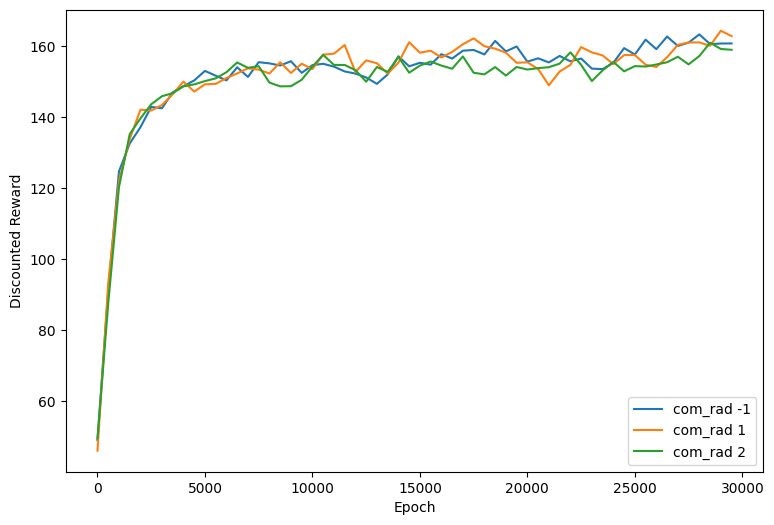

In [40]:
fig, axs = plt.subplots(1, 1, figsize=(9,6))
comm_exp = ['comm_rad_exp_-1', 'comm_rad_exp_1', 'comm_rad_exp_2']
labels = [f"com_rad {i}" for i in [-1, 1, 2]]
for i in range(3):
    sns.lineplot(communication_mean_avg, x="epoch", y=comm_exp[i], label=labels[i], ax=axs)
plt.ylabel("Discounted Reward")
plt.xlabel("Epoch")
plt.savefig("Plots/catmouse_communication_experiment.png", dpi=300)

PPO num_agent_exp_2
110.316
MAPPO num_agent_exp_2
139.912
IPPO num_agent_exp_2
126.372
IPPO Belief num_agent_exp_2
130.032
PPO num_agent_exp_3
158.31
MAPPO num_agent_exp_3
246.654
IPPO num_agent_exp_3
206.154
IPPO Belief num_agent_exp_3
219.972
PPO num_agent_exp_4
208.68
MAPPO num_agent_exp_4
372.832
IPPO num_agent_exp_4
287.792
IPPO Belief num_agent_exp_4
302.424


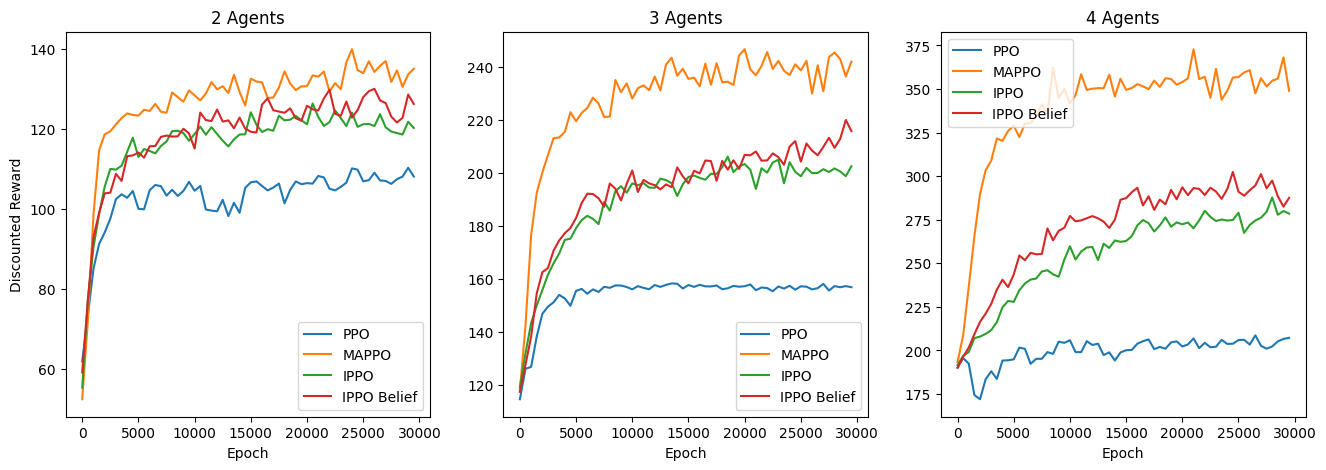

In [50]:
fig, axs = plt.subplots(1, 3, figsize=(16,5))
num_ag_exp = ['num_agent_exp_2',	'num_agent_exp_3',	'num_agent_exp_4']
ylabels = ["Discounted Reward", "", ""]
labels = [f"num_ag {i}" for i in [2, 3, 4]]
for i in range(3):
    for k in range(len(algorithm_name)):
        sns.lineplot(algorithm_score_means[k], x="epoch", y=num_ag_exp[i], ax=axs[i], label=algorithm_name[k])
        print(algorithm_name[k] + " " + num_ag_exp[i])
        print(np.max(algorithm_score_means[k][num_ag_exp[i]]))
    axs[i].set_xlabel("Epoch")
    axs[i].set_ylabel(ylabels[i])
    axs[i].set_title(f"{i+2} Agents")
plt.savefig("Plots/catmouse_number_agents_experiment.png", dpi=300)

PPO env_comp_exp_0
99.112
MAPPO env_comp_exp_0
134.424
IPPO env_comp_exp_0
124.8
IPPO Belief env_comp_exp_0
126.676
PPO env_comp_exp_1
143.9
MAPPO env_comp_exp_1
188.568
IPPO env_comp_exp_1
180.764
IPPO Belief env_comp_exp_1
196.912
PPO env_comp_exp_2
138.316
MAPPO env_comp_exp_2
210.596
IPPO env_comp_exp_2
227.416
IPPO Belief env_comp_exp_2
218.068


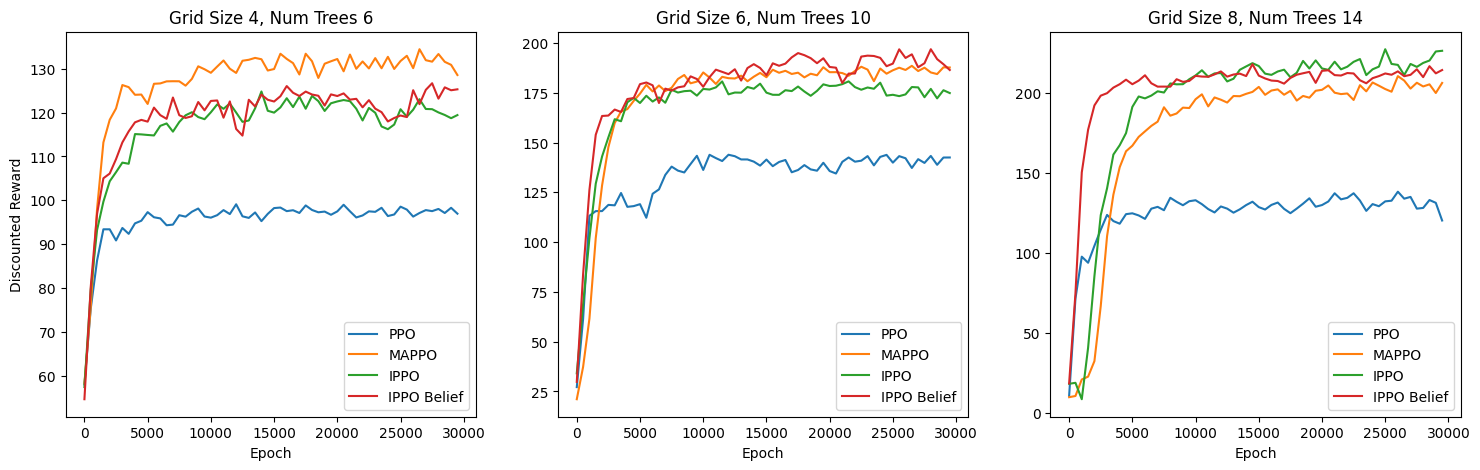

In [51]:
fig, axs = plt.subplots(1, 3, figsize=(18,5))
num_ag_exp = ['env_comp_exp_0','env_comp_exp_1','env_comp_exp_2']
ylabels = ["Discounted Reward", "", ""]
labels = [f"grid_size {i}" for i in [4, 6, 8]]
titles = ["Grid Size 4, Num Trees 6", "Grid Size 6, Num Trees 10", "Grid Size 8, Num Trees 14"]
for i in range(3):
    for k in range(len(algorithm_name)):
        sns.lineplot(algorithm_score_means[k], x="epoch", y=num_ag_exp[i], ax=axs[i], label=algorithm_name[k])
        print(algorithm_name[k] + " " + num_ag_exp[i])
        print(np.max(algorithm_score_means[k][num_ag_exp[i]]))
    axs[i].set_xlabel("Epoch")
    axs[i].set_ylabel(ylabels[i])
    axs[i].set_title(titles[i])
plt.savefig("Plots/catmouse_environment_complexity_experiment.png", dpi=300)